In [1]:
# require(stats); require(graphics)
# X=as.matrix(longley[,1:6])
# y=as.matrix(longley[,7])

# ## give the data set in the form it is used in S-PLUS:
# longley.x <- data.matrix(scale(longley[, 1:6]))
# longley.y <- scale(longley[, "Employed"])
# pairs(longley, main = "longley data")
# summary(fm1 <- lm(Employed ~ ., data = as.data.frame(scale(longley))))
# opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
#             mar = c(4.1, 4.1, 2.1, 1.1))
# plot(fm1)
# par(opar)

## 第一问：检查复共线性

In [1]:
X=as.matrix(longley[,1:6])
y=as.matrix(longley[,7])
oldX=X
oldY=y
xmean=colMeans(X)
xsd=apply(X,2,sd)*sqrt(15)
ymean=mean(y)
ysd=sd(y)*sqrt(15)
centered=X-matrix(rep(colMeans(X),16),byrow=T,nrow=16,ncol=6)
X=centered/matrix(rep(apply(X,2,sd)*sqrt(15),16),byrow=T,nrow=16,ncol=6)
y=(y-mean(y))/matrix(rep(sd(y)*sqrt(15),16),byrow=T,nrow=16,ncol=1)
fm1 <- lm(Employed ~ ., data = as.data.frame(scale(longley)))

In [3]:
ysd*(phi[,1:3]%*%alph2)/as.vector(xsd)

ERROR: Error in eval(expr, envir, enclos): object 'phi' not found


In [ ]:
(phi[,1:3]%*%alph2)

3.961708
4.879001
-4.203628
-1.613747
4.145179
3.742352


In [ ]:
alph2

-0.4456511
0.1115693
0.5297276


下面是主成分回归的检验结果

In [ ]:
(as.matrix(longley[,1:6])%*%betaz+rep(inter,16)-as.vector(longley[,7]))

1947,165.9878
1948,178.9425
1949,136.1006
1950,155.4386
1951,193.3999
1952,199.9283
1953,208.7402
1954,159.6137
1955,195.0735
1956,207.4992
1957,214.7289


In [ ]:
betaz

0.2912636
0.3587028
-0.3090495
-0.1186422
0.3047524
0.2751366


In [ ]:
longley

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019


In [ ]:
inter=mean(y)-sd(y)*sqrt(15)*t(beta2)%*%(as.vector(colMeans(X)/(apply(X,2,sd)*sqrt(15))))

条件数：程度小  100  较强  1000  严重

In [ ]:
kappa(t(X)%*%X,exact=T)

[1] 12220.01

In [4]:
solve(t(X)%*%X)%*%t(X)%*%y

GNP.deflator,0.04628202
GNP,-1.01374635
Unemployed,-0.53754258
Armed.Forces,-0.20474069
Population,-0.10122111
Year,2.47966438


方差扩大因子法：不存在  10  较强   100    严重

In [ ]:
library(car)
vif(fm1)

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
   135.53244   1788.51348     33.61889      3.58893    399.15102    758.98060

绘图

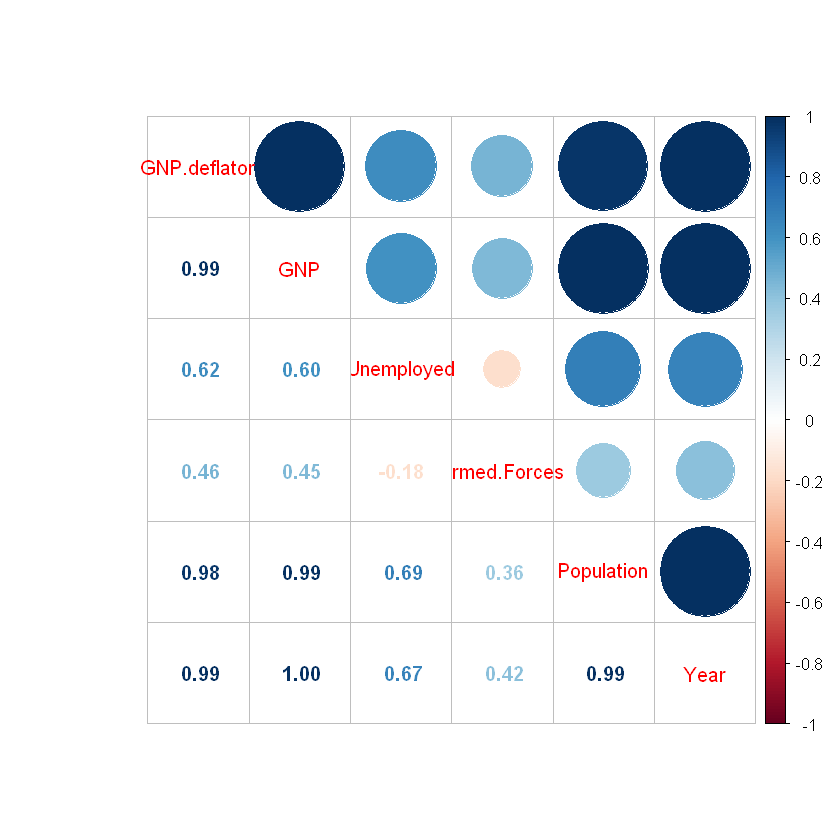

In [ ]:
library(corrplot)
corrplot.mixed(cor(X))

## 第二问：主成分估计

In [ ]:
(alph0=mean(y))
Z1=X%*%phi[,1:3]
alph1=solve(t(Z1)%*%Z1)%*%t(Z1)%*%y
beta1=phi[,1:3]%*%alph1
inter=ymean-ysd*t(beta2)%*%(as.vector(xmean/xsd))
betaz=ysd*(phi[,1:3]%*%alph2)/as.vector(xsd)
(oldX%*%betaz+rep(inter,16)-oldY)

[1] -4.922278e-16

1947,-0.17234061
1948,0.34533289
1949,-0.04291875
1950,0.14566152
1951,0.27508290
1952,0.55004065
1953,0.10213269
1954,-0.09371295
1955,-0.45603563
1956,-1.07693130
1957,-0.36063457


In [ ]:
(phi=eigen(t(X)%*%X)$vectors)
(gam=diag(eigen(t(X)%*%X)$values))
(Z=X%*%phi)
#这里没问题

-0.4618349,0.0578427677,0.1491199,0.792873559,-0.337937826,0.13518707
-0.4615043,0.0532122862,0.2776823,-0.121621225,0.149573192,-0.81848082
-0.3213167,-0.5955137627,-0.7283057,0.007645795,-0.009231961,-0.10745268
-0.2015097,0.7981925480,-0.5616075,-0.077254979,-0.024252472,-0.01797096
-0.4622794,-0.0455444698,0.1959846,-0.589744965,-0.548578173,0.31157087
-0.4649403,0.0006187884,0.1281157,-0.052286554,0.749542836,0.45040888


4.603377,0.00000,0.0000000,0.00000000,0.000000000,0.0000000000
0.000000,1.17534,0.0000000,0.00000000,0.000000000,0.0000000000
0.000000,0.00000,0.2034254,0.00000000,0.000000000,0.0000000000
0.000000,0.00000,0.0000000,0.01492826,0.000000000,0.0000000000
0.000000,0.00000,0.0000000,0.00000000,0.002552066,0.0000000000
0.000000,0.00000,0.0000000,0.00000000,0.000000000,0.0003767081


1947,0.898235508,-0.19402775,0.079511268,-0.042406054,-0.0022714303,0.0006659502
1948,0.777310468,-0.21922133,0.165823376,0.032512939,-0.0158913128,0.0030932645
1949,0.605037469,-0.39762541,-0.127403989,-0.002276517,-0.0014836793,0.0013065120
1950,0.540643189,-0.32954452,-0.028735776,-0.015816335,0.0159683879,-0.0035312718
1951,0.371351917,0.31908067,-0.007512367,0.025165094,-0.0134924582,-0.0110204407
1952,0.260847578,0.49628523,-0.041625960,0.011978645,-0.0095631050,-0.0032922649
1953,0.181365955,0.49330529,0.017334423,-0.018304337,-0.0056063465,0.0082025012
1954,-0.008388974,0.15312430,-0.268267955,-0.016823278,0.0005828204,0.0043103827
1955,-0.025693908,0.17905905,-0.025191774,-0.026106642,0.0255123675,-0.0048862303
1956,-0.116042743,0.14145282,0.075638915,0.004534462,0.0216272081,0.0036510912
1957,-0.246596117,0.11088300,0.114960022,0.030810933,0.0061175778,0.0070111363


In [ ]:
(gam[1,1]/sum(diag(gam)))
((gam[1,1]+gam[2,2]+gam[3,3])/sum(diag(gam)))
#没问题

[1] 0.7672295

[1] 0.9970238

于是选前两个主成分

In [ ]:
(Z1=X%*%phi[,1:2])

1947,0.898235508,-0.19402775
1948,0.777310468,-0.21922133
1949,0.605037469,-0.39762541
1950,0.540643189,-0.32954452
1951,0.371351917,0.31908067
1952,0.260847578,0.49628523
1953,0.181365955,0.49330529
1954,-0.008388974,0.15312430
1955,-0.025693908,0.17905905
1956,-0.116042743,0.14145282
1957,-0.246596117,0.11088300


In [ ]:
(Z2=X%*%phi[,1:3])

1947,0.898235508,-0.19402775,0.079511268
1948,0.777310468,-0.21922133,0.165823376
1949,0.605037469,-0.39762541,-0.127403989
1950,0.540643189,-0.32954452,-0.028735776
1951,0.371351917,0.31908067,-0.007512367
1952,0.260847578,0.49628523,-0.041625960
1953,0.181365955,0.49330529,0.017334423
1954,-0.008388974,0.15312430,-0.268267955
1955,-0.025693908,0.17905905,-0.025191774
1956,-0.116042743,0.14145282,0.075638915
1957,-0.246596117,0.11088300,0.114960022


其最小二乘估计为：

In [ ]:
(alph0=mean(y))
(alph1=solve(t(Z1)%*%Z1)%*%t(Z1)%*%y)

[1] -4.922278e-16

-0.4456511
0.1115693


In [ ]:
(alph2=solve(t(Z2)%*%Z2)%*%t(Z2)%*%y)

-0.4456511
0.1115693
0.5297276


In [ ]:
beta2

0.2912636
0.3587028
-0.3090495
-0.1186422
0.3047524
0.2751366


In [ ]:
betaz=sd(y)*sqrt(15)*(phi[,1:3]%*%alph2)/as.vector(apply(X,2,sd)*sqrt(15))

In [ ]:
0.42/94

[1] 0.004468085

In [ ]:
(beta1=phi[,1:2]%*%alph1)

0.2122707
0.2116068
0.0767541
0.1788568
0.2009339
0.2072702


In [ ]:
X

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
1947,-0.44696790,-0.39851271,-0.23135519,-0.37720964,-0.36435355,-0.40674461
1948,-0.31537481,-0.33321416,-0.23992071,-0.42692609,-0.32634438,-0.35251199
1949,-0.32255262,-0.33677822,0.13502771,-0.36756317,-0.28399236,-0.29827938
1950,-0.29144879,-0.26782209,0.04357014,-0.35494854,-0.24108357,-0.24404677
1951,-0.13114448,-0.15254626,-0.30236606,0.18265693,-0.19854596,-0.18981415
1952,-0.08568505,-0.10572520,-0.34850931,0.36631098,-0.15418955,-0.13558154
1953,-0.06415163,-0.05796376,-0.36564033,0.34887312,-0.08648571,-0.08134892
1954,-0.04022562,-0.06386835,0.10629180,0.27578252,-0.04472759,-0.02711631
1955,-0.01151440,0.02538106,-0.07993903,0.16373500,-0.00133626,0.02711631
1956,0.06983406,0.08177986,-0.10259619,0.09287051,0.04862502,0.08134892


用自带的函数写为：

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4       Comp.5
Standard deviation     0.5363871 0.2710328 0.11275675 0.030545313 0.0126294937
Proportion of Variance 0.7672295 0.1958901 0.03390423 0.002488043 0.0004253443
Cumulative Proportion  0.7672295 0.9631196 0.99702383 0.999511871 0.9999372153
                             Comp.6
Standard deviation     4.852243e-03
Proportion of Variance 6.278469e-05
Cumulative Proportion  1.000000e+00

Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
GNP.deflator  0.462         0.149  0.793  0.338  0.135
GNP           0.462         0.278 -0.122 -0.150 -0.818
Unemployed    0.321 -0.596 -0.728               -0.107
Armed.Forces  0.202  0.798 -0.562                     
Population    0.462         0.196 -0.590  0.549  0.312
Year          0.465         0.128        -0.750  0.450

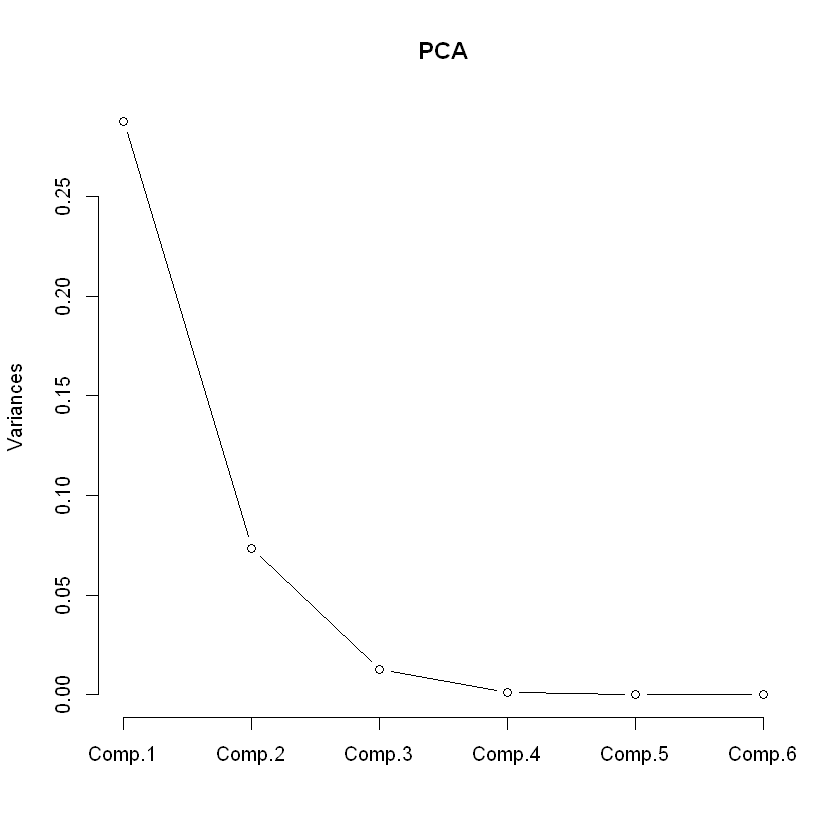

In [ ]:
PCA=princomp(X)
summary(PCA,loadings=T)
screeplot(PCA,type="lines")

,Comp.1,Comp.2,PC,rank
1947,-0.898235508,-0.19402775,-0.75500582,1
1948,-0.777310468,-0.21922133,-0.66380003,2
1949,-0.605037469,-0.39762541,-0.56285167,3
1950,-0.540643189,-0.32954452,-0.49770757,4
1951,-0.371351917,0.31908067,-0.23092398,5
1952,-0.260847578,0.49628523,-0.10685340,6
1953,-0.181365955,0.49330529,-0.04414374,7
1954,0.008388974,0.15312430,0.03782687,8
1955,0.025693908,0.17905905,0.05688703,9
1956,0.116042743,0.14145282,0.12121093,10


,Comp.1,Comp.2,PC,rank
1947,-0.898235508,-0.19402775,-0.75500582,1
1948,-0.777310468,-0.21922133,-0.66380003,2
1949,-0.605037469,-0.39762541,-0.56285167,3
1950,-0.540643189,-0.32954452,-0.49770757,4
1951,-0.371351917,0.31908067,-0.23092398,5
1952,-0.260847578,0.49628523,-0.10685340,6
1953,-0.181365955,0.49330529,-0.04414374,7
1954,0.008388974,0.15312430,0.03782687,8
1955,0.025693908,0.17905905,0.05688703,9
1956,0.116042743,0.14145282,0.12121093,10


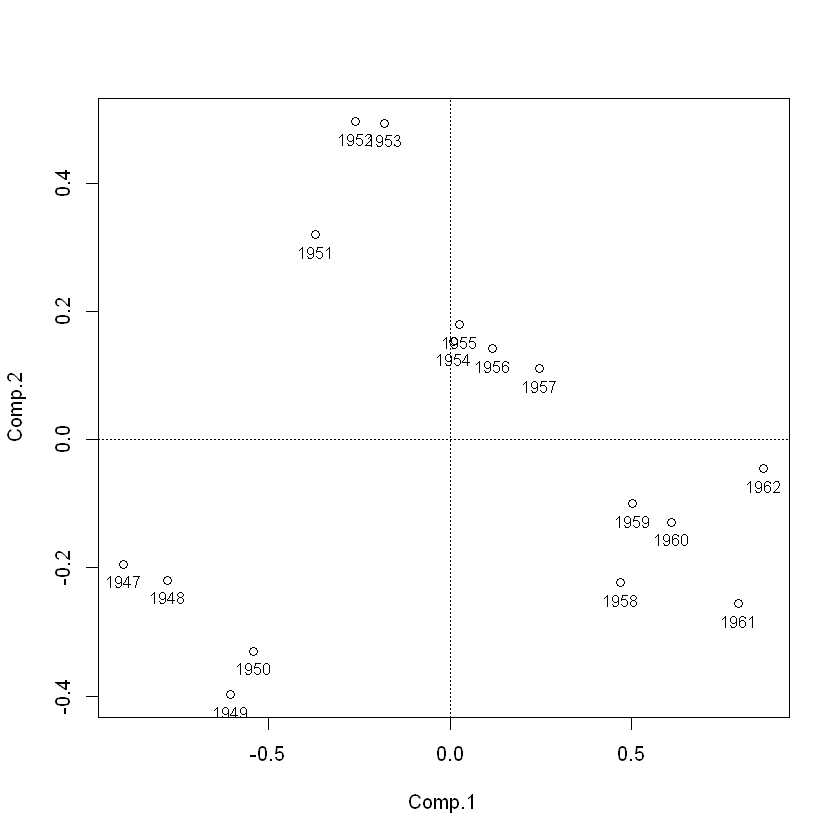

In [ ]:
#这个不知道干啥用的
source("mvstats.R")
princomp.rank(PCA,m=2)
princomp.rank(PCA,m=2,plot=T)

## 第三问：岭回归

In [6]:
betahat <- function(k){
    return (solve(t(X)%*%X+k*diag(6))%*%t(X)%*%y)
}

In [10]:
betahat(0)

GNP.deflator,0.04628202
GNP,-1.01374635
Unemployed,-0.53754258
Armed.Forces,-0.20474069
Population,-0.10122111
Year,2.47966438


In [12]:
solve(t(X)%*%X+0.02*diag(6))

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
GNP.deflator,24.1075452,-10.1982461,-0.8837947,-1.8255787,-2.925058,-9.298475
GNP,-10.1982461,34.6853658,3.3286450,0.1876594,-13.812172,-12.732826
Unemployed,-0.8837947,3.3286450,3.2651752,1.5348188,-2.131576,-3.079043
Armed.Forces,-1.8255787,0.1876594,1.5348188,2.1662534,1.116668,-1.388999
Population,-2.9250585,-13.8121718,-2.1315761,1.1166681,28.285630,-10.303931
Year,-9.2984748,-12.7328265,-3.0790433,-1.3889986,-10.303931,35.066261


In [51]:
betat=solve(t(oldX)%*%oldX)%*%t(oldX)%*%oldY

In [15]:
inter2=ymean-ysd*t(betahat(0))%*%(as.vector(xmean/xsd))
inter2

-3482.259


In [14]:
ysd

[1] 13.60179

In [18]:
betal2=ysd*(betahat(0))/as.vector(xsd)
betal2[1:5]

[1]  0.01506187 -0.03581918 -0.02020230 -0.01033227 -0.05110411

In [19]:
oldX[,1:5]%*%betal2[1:5]+rep(inter2,16) - oldY

1947,-3561.625
1948,-3563.093
1949,-3565.062
1950,-3566.435
1951,-3568.984
1952,-3570.254
1953,-3572.169
1954,-3574.149
1955,-3576.005
1956,-3578.276
1957,-3579.632


In [44]:
as.vector(betal2)
inter2


[1]  0.01506187 -0.03581918 -0.02020230 -0.01033227 -0.05110411  1.82915146

-3482.259


In [53]:
e=as.matrix(longley[,1:6])%*%betat+rep(inter2,16)-as.vector(longley[,7])
e

1947,-3482.539
1948,-3482.128
1949,-3482.349
1950,-3481.857
1951,-3481.818
1952,-3481.715
1953,-3482.460
1954,-3482.475
1955,-3482.332
1956,-3483.172
1957,-3482.683


In [46]:
sqrt(t(e)%*%e)

0.9145622


In [47]:
e

1947,-0.26734003
1948,0.09401394
1949,-0.04628717
1950,0.41011462
1951,-0.30971459
1952,0.24931122
1953,0.16404896
1954,0.01318036
1955,-0.01430477
1956,-0.45539409
1957,0.01726893


岭迹法

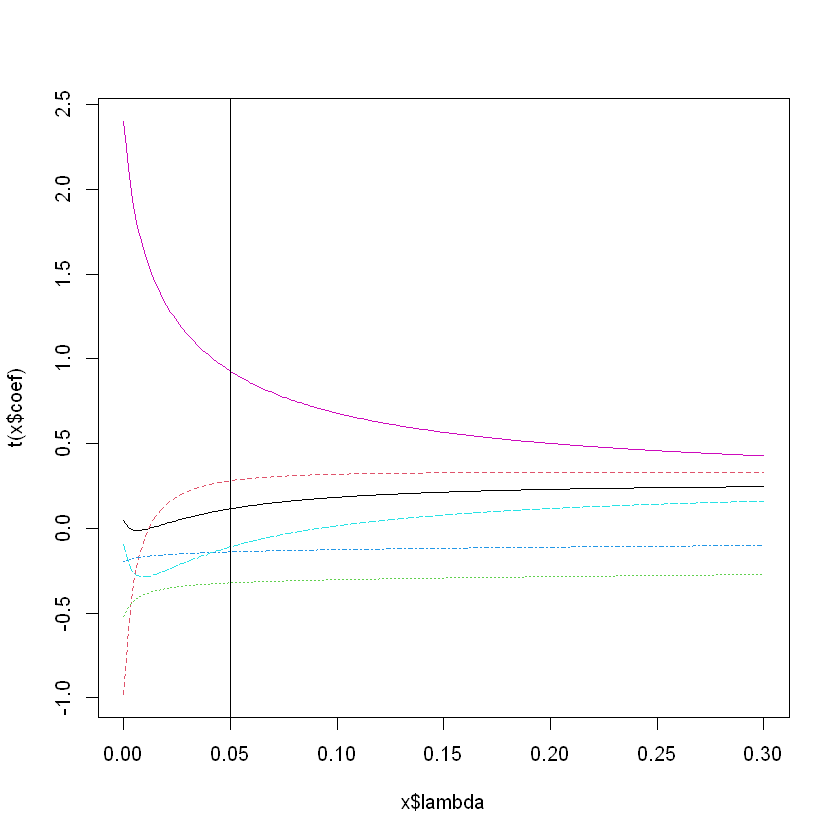

In [ ]:
library("MASS")
plot(lm.ridge(Employed~.,as.data.frame(scale(longley)),lambda = seq(0,0.3,0.001)))
abline(v=0.05)

In [ ]:
lm.ridge(Employed~.,as.data.frame(scale(longley)),lambda =0.024)

               GNP.deflator           GNP    Unemployed  Armed.Forces 
-1.640219e-15  4.379723e-02  1.860545e-01 -3.584611e-01 -1.577363e-01 
   Population          Year 
-2.335685e-01  1.278342e+00 

In [ ]:
cor(longley)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP.deflator,1.0000000,0.9915892,0.6206334,0.4647442,0.9791634,0.9911492,0.9708985
GNP,0.9915892,1.0000000,0.6042609,0.4464368,0.9910901,0.9952735,0.9835516
Unemployed,0.6206334,0.6042609,1.0000000,-0.1774206,0.6865515,0.6682566,0.5024981
Armed.Forces,0.4647442,0.4464368,-0.1774206,1.0000000,0.3644163,0.4172451,0.4573074
Population,0.9791634,0.9910901,0.6865515,0.3644163,1.0000000,0.9939528,0.9603906
Year,0.9911492,0.9952735,0.6682566,0.4172451,0.9939528,1.0000000,0.9713295
Employed,0.9708985,0.9835516,0.5024981,0.4573074,0.9603906,0.9713295,1.0000000


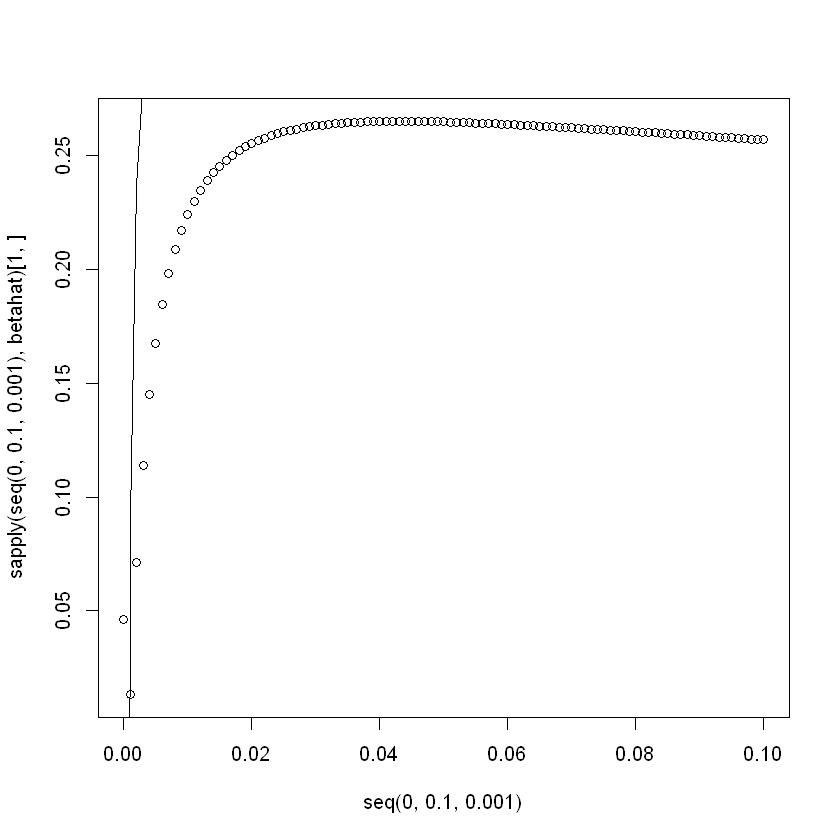

In [ ]:
plot(seq(0,0.1,0.001),sapply(seq(0,0.1,0.001),betahat)[1,])
lines(seq(0,0.1,0.001),sapply(seq(0,0.1,0.001),betahat)[2,])

In [ ]:
names(as.data.frame(t(rbind(seq(0,0.3,0.001),sapply(seq(0,0.3,0.001),betahat)))))[2:7]

[1] "V2" "V3" "V4" "V5" "V6" "V7"

In [ ]:
dd<- as.data.frame(t(rbind(seq(0,0.03,0.00001),sapply(seq(0,0.03,0.00001),betahat))),col.names=c('x',' GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population','Year'))

In [ ]:
write.csv(dd,"dd.csv")

In [ ]:
dd

V1,V2,V3,V4,V5,V6,V7
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000,0.0462820227,-1.0137463,-0.5375426,-0.2047407,-0.1012211,2.479664
0.00001,0.0416094733,-0.9728058,-0.5319512,-0.2036340,-0.1133999,2.451431
0.00002,0.0372684236,-0.9339729,-0.5266381,-0.2025751,-0.1248027,2.424402
0.00003,0.0332333068,-0.8970918,-0.5215827,-0.2015606,-0.1354884,2.398490
0.00004,0.0294810269,-0.8620215,-0.5167665,-0.2005872,-0.1455105,2.373619
0.00005,0.0259906692,-0.8286342,-0.5121728,-0.1996522,-0.1549173,2.349716
0.00006,0.0227432501,-0.7968138,-0.5077863,-0.1987530,-0.1637526,2.326718
0.00007,0.0197215007,-0.7664547,-0.5035931,-0.1978873,-0.1720565,2.304566
0.00008,0.0169096788,-0.7374606,-0.4995804,-0.1970529,-0.1798653,2.283207


H-K公式

In [ ]:
(alphhat=solve(gam)%*%t(Z)%*%y)

(sig2hat=(t(y-Z%*%alphhat-(rep(alph0,length(y))))%*%(y-Z%*%alphhat-(rep(alph0,length(y)))))/10)

-0.4456511
0.1115693
0.5297276
0.1017377
1.7568007
1.9827538


0.0004520995


In [ ]:
y-Z%*%alphhat

1947,0.019654761
1948,-0.006911878
1949,0.003403019
1950,-0.030151507
1951,0.022770126
1952,-0.018329288
1953,-0.012060831
1954,-0.000969016
1955,0.001051683
1956,0.033480441
1957,-0.001269606


In [ ]:
betahat(0.02)

GNP.deflator,0.2554418
GNP,0.3389921
Unemployed,-0.2794636
Armed.Forces,-0.1027295
Population,0.1713698
Year,0.4314136


In [ ]:
sig2hat^2/(max(alphhat^2)) #不对！！

5.199129e-08


方差膨胀因子法：
https://blog.csdn.net/weixin_36245388/article/details/112481767?spm=1001.2101.3001.6650.3&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-3-112481767-blog-104657790.pc_relevant_3mothn_strategy_recovery&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-3-112481767-blog-104657790.pc_relevant_3mothn_strategy_recovery&utm_relevant_index=6

In [ ]:
chat <- function(k){
    return (max(diag(solve(t(Z)%*%Z+diag(k,6))%*%t(Z)%*%(Z)%*%solve(t(Z)%*%Z+diag(k,6)))))
}

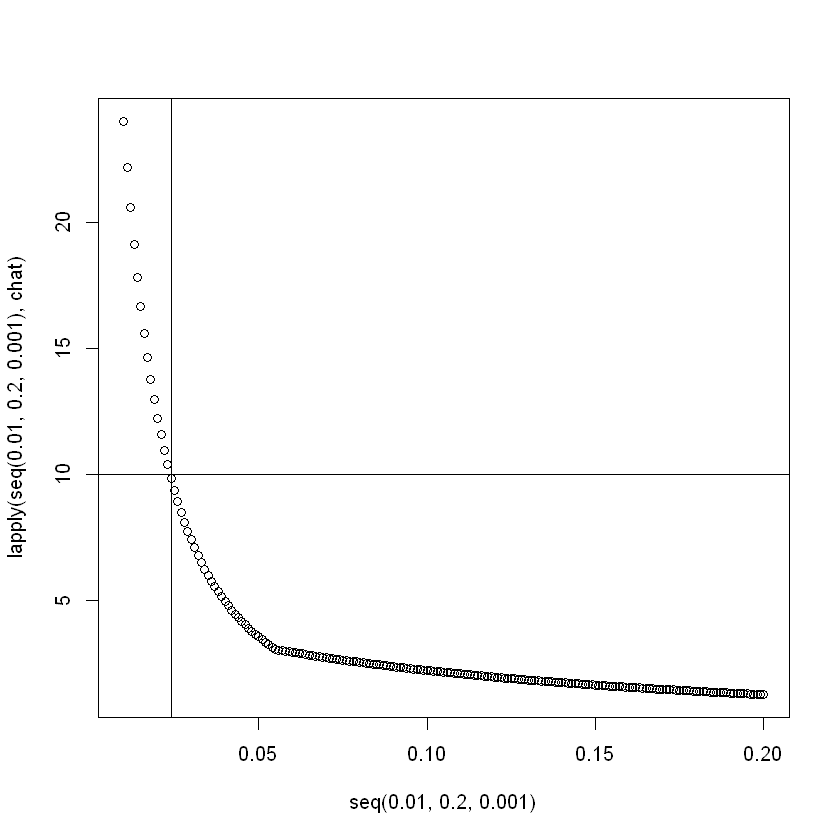

In [ ]:
plot(seq(0.01,0.2,0.001),lapply(seq(0.01,0.2,0.001),chat))
abline(h=10,v=0.024)

In [ ]:
betahat(0.024)

GNP.deflator,0.25974398
GNP,0.33742682
Unemployed,-0.27230214
Armed.Forces,-0.09715509
Population,0.18673721
Year,0.40522428


In [ ]:
library(ridge)
mod <- linearRidge(fm1)
summary(mod)


Call:
linearRidge(formula = fm1)


Coefficients:
               Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)  -1.927e-15              NA                  NA               NA
GNP.deflator  2.650e-01       1.027e+00           2.188e-01            4.691
GNP           3.259e-01       1.262e+00           9.414e-02           13.408
Unemployed   -2.364e-01      -9.155e-01           1.925e-01            4.757
Armed.Forces -7.043e-02      -2.728e-01           1.689e-01            1.615
Population    2.250e-01       8.715e-01           1.817e-01            4.795
Year          3.320e-01       1.286e+00           1.136e-01           11.318
             Pr(>|t|)    
(Intercept)        NA    
GNP.deflator 2.72e-06 ***
GNP           < 2e-16 ***
Unemployed   1.97e-06 ***
Armed.Forces    0.106    
Population   1.62e-06 ***
Year          < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Ridge parameter: 0.04813729, chosen automatically, compute